# Clustering approach

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

## Data preprocessing


## 1. Data cleaning

### 1.1. Loading and providing information

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,...,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,826.164590,834.746130,816.663631,826.197849,4.309489e+06,25.257533,865.297646,764.267514,824.986211,823.770396,...,113.401112,112.954962,111.653683,2098.568795,2097.680303,2094.146624,18694.046041,18687.238949,18660.280890,827.404666
std,698.038503,705.987111,689.294489,698.082871,2.417880e+06,29.641950,730.285700,638.652752,696.627602,695.169032,...,52.643302,52.248810,51.174082,596.210304,595.946837,594.947984,5129.355628,5128.307884,5124.540611,699.515103
min,157.840000,159.870000,156.570000,157.780000,8.813000e+05,2.454017,164.124849,148.681227,157.780000,155.530000,...,45.335000,44.828000,42.630200,1099.230000,1099.230000,1099.230000,10655.300000,10655.300000,10655.300000,157.780000
25%,266.810000,269.480000,263.850000,266.490000,2.755800e+06,6.951115,277.869989,253.212633,266.410000,266.380000,...,63.835000,63.633500,62.854000,1562.170000,1560.700000,1556.220000,14567.170000,14565.250000,14539.140000,266.560000
50%,528.520000,534.560000,521.400000,529.420000,3.686200e+06,13.908356,558.160917,472.483684,529.000000,527.460000,...,102.697000,102.748500,102.633400,2067.030000,2066.960000,2066.130000,17716.050000,17712.660000,17705.910000,529.440000
75%,1445.000000,1459.780000,1415.020000,1442.840000,5.070300e+06,31.115370,1552.733137,1334.556935,1441.500000,1437.820000,...,157.845000,157.894500,158.643600,2639.440000,2639.400000,2636.780000,23924.980000,23909.840000,23860.460000,1447.340000
max,3251.060000,3344.290000,3165.430000,3225.000000,2.413420e+07,205.254540,3321.751870,2948.254283,3225.000000,3225.000000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,3225.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2473 non-null   object 
 1   Open              2473 non-null   float64
 2   High              2473 non-null   float64
 3   Low               2473 non-null   float64
 4   Close(t)          2473 non-null   float64
 5   Volume            2473 non-null   int64  
 6   SD20              2473 non-null   float64
 7   Upper_Band        2473 non-null   float64
 8   Lower_Band        2473 non-null   float64
 9   S_Close(t-1)      2473 non-null   float64
 10  S_Close(t-2)      2473 non-null   float64
 11  S_Close(t-3)      2473 non-null   float64
 12  S_Close(t-5)      2473 non-null   float64
 13  S_Open(t-1)       2473 non-null   float64
 14  MA5               2473 non-null   float64
 15  MA10              2473 non-null   float64
 16  MA20              2473 non-null   float64


### 1.2. Handling null values

In [5]:
df.isnull().any().any()
print('No null values')

No null values


### 1.3. Dropping irrelevant columns

In [6]:
X=df.iloc[:,0:64] #independent columns
cols = [0, 36, 63]
X.drop(X.columns[cols], axis=1, inplace=True)
y=df.iloc[:,-1] #target variable

### 1.4. Handling outliers using z-scores

In [7]:
z_scores = zscore(X)
data_no_outliers = X[(np.abs(z_scores) < 3).all(axis=1)]

In [8]:
if data_no_outliers.empty:
    print("\nNo outliers detected.")
else:
    print("\nData without outliers:")
    print(data_no_outliers)


No outliers detected.


## 2. Feature engineering

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_scores = pca.fit_transform(X_scaled)
X_scores

array([[-6.75226040e+00, -1.43522347e+00,  1.87606204e+00, ...,
         9.35576570e-16,  5.26846790e-17,  2.58248491e-14],
       [-6.83366539e+00,  4.21721503e-01,  1.27050049e+00, ...,
        -1.05694695e-15, -3.05584464e-16,  1.21905539e-16],
       [-6.83270290e+00,  1.25531538e-01,  1.41796478e+00, ...,
        -1.20752131e-15, -1.84154462e-16, -4.72264181e-15],
       ...,
       [ 1.81554367e+01,  4.09182030e-01,  3.78464146e-01, ...,
        -1.53490854e-16, -1.04083300e-16, -1.97089610e-16],
       [ 1.82859716e+01, -1.12615172e+00,  6.95028731e-01, ...,
        -3.69765355e-16, -7.46307047e-17,  1.17313783e-16],
       [ 1.83289696e+01, -4.84131334e-01,  5.98093483e-01, ...,
        -4.35307982e-17,  1.59901416e-18,  1.17929861e-16]])

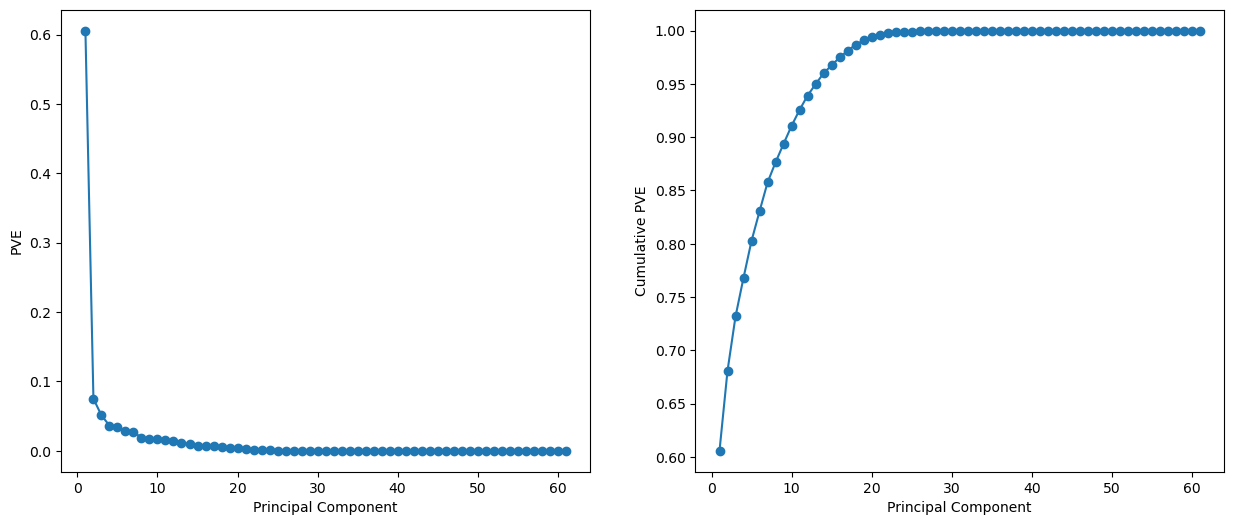

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ticks = np.arange(pca.n_components_)+1
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

In [11]:
pca = PCA(n_components=10)

# Fit and transform your data
X_scores = pca.fit_transform(X)

# Get the indices of the top 10 components
top_components = X_scores.argsort(axis=1)[:, ::-1][:, :10]

# Get the names of the top 10 important features without repeating column names
important_features = []
seen_features = set() #keeps record of important features
for indices in top_components:
    for i in indices:
        feature_name = X.columns[i] #feature name with corresponding index
        if feature_name not in seen_features:
            important_features.append(feature_name) #add unique features
            seen_features.add(feature_name) #store already added features
            if len(important_features) == 10:
                break
    if len(important_features) == 10:
        break

# Print the names of the 10 important features without repeating column names
print("10 Important Features selected from PCA Reduction:")
print(important_features)

10 Important Features selected from PCA Reduction:
['High', 'Low', 'Volume', 'SD20', 'S_Close(t-2)', 'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'Close(t)', 'Open']


### Select PCA reduced features

In [12]:
selected_features = ['High', 'Low', 'Volume', 'SD20', 'S_Close(t-2)', 'Upper_Band', 
                     'Lower_Band', 'S_Close(t-1)', 'Close(t)', 'Open']
df_selected = df[selected_features]
X = df_selected.values #converting features into numpy array
# y = df['Close_forcast']

## 3. Choosing value of k for kmeans algorithm


### 3.1. Elbow method

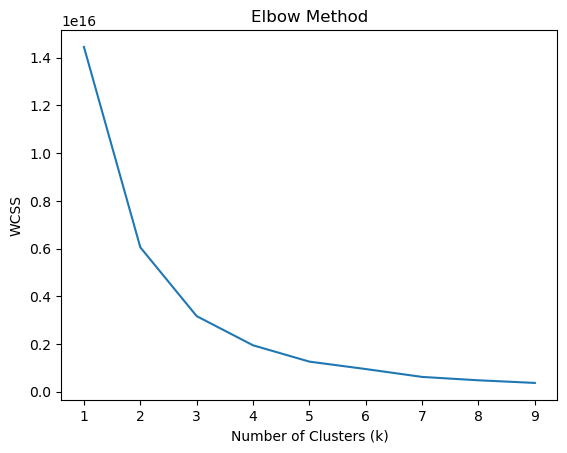

In [13]:
# Define a range of cluster numbers to test
k_values = range(1, 10)

# Compute the WCSS for each k value
wcss = []
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    wcss.append(model.inertia_)

# Plot the WCSS values
plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

### 3.2. Silhouette method

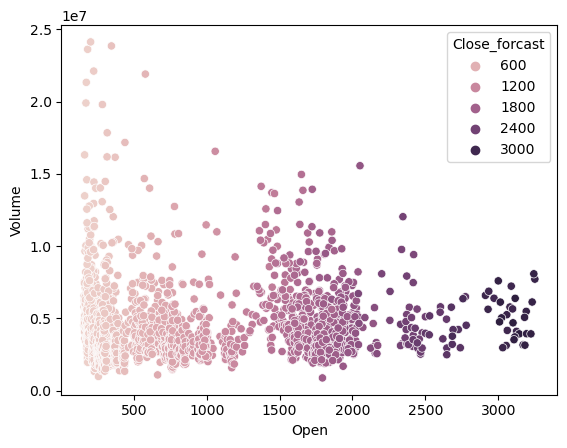

In [14]:
#View our dataset
sns.scatterplot(data = df, x = 'Open', y = 'Volume', hue = 'Close_forcast')

#Split dataset into training and testing group
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'Volume']], df[['Close_forcast']], test_size=0.33, random_state=0)

#Normalization of dataset
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

0.6422678786706146

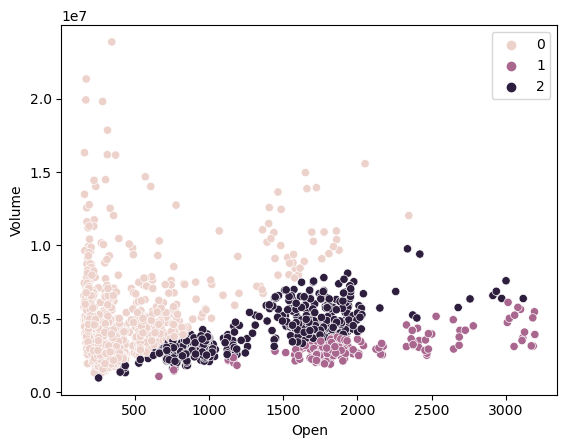

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

#View outcome of clusteres formed
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = kmeans.labels_)
#Metric-based evalaution of the clusteres generated
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

<Axes: ylabel='Close_forcast'>

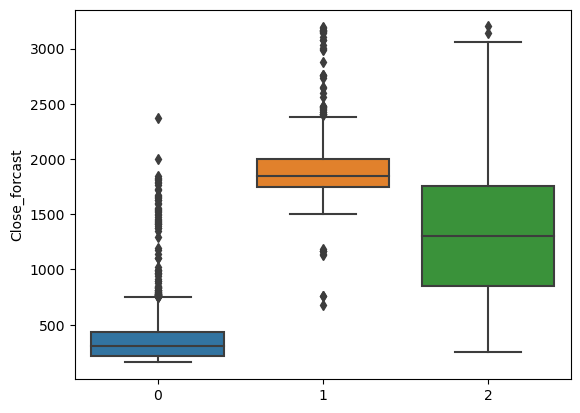

In [16]:
#View a distribution of some values using boxplot
sns.boxplot(x = kmeans.labels_, y = y_train['Close_forcast'])

In [17]:
K = range(2, 11)
fits = []
score = []
for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

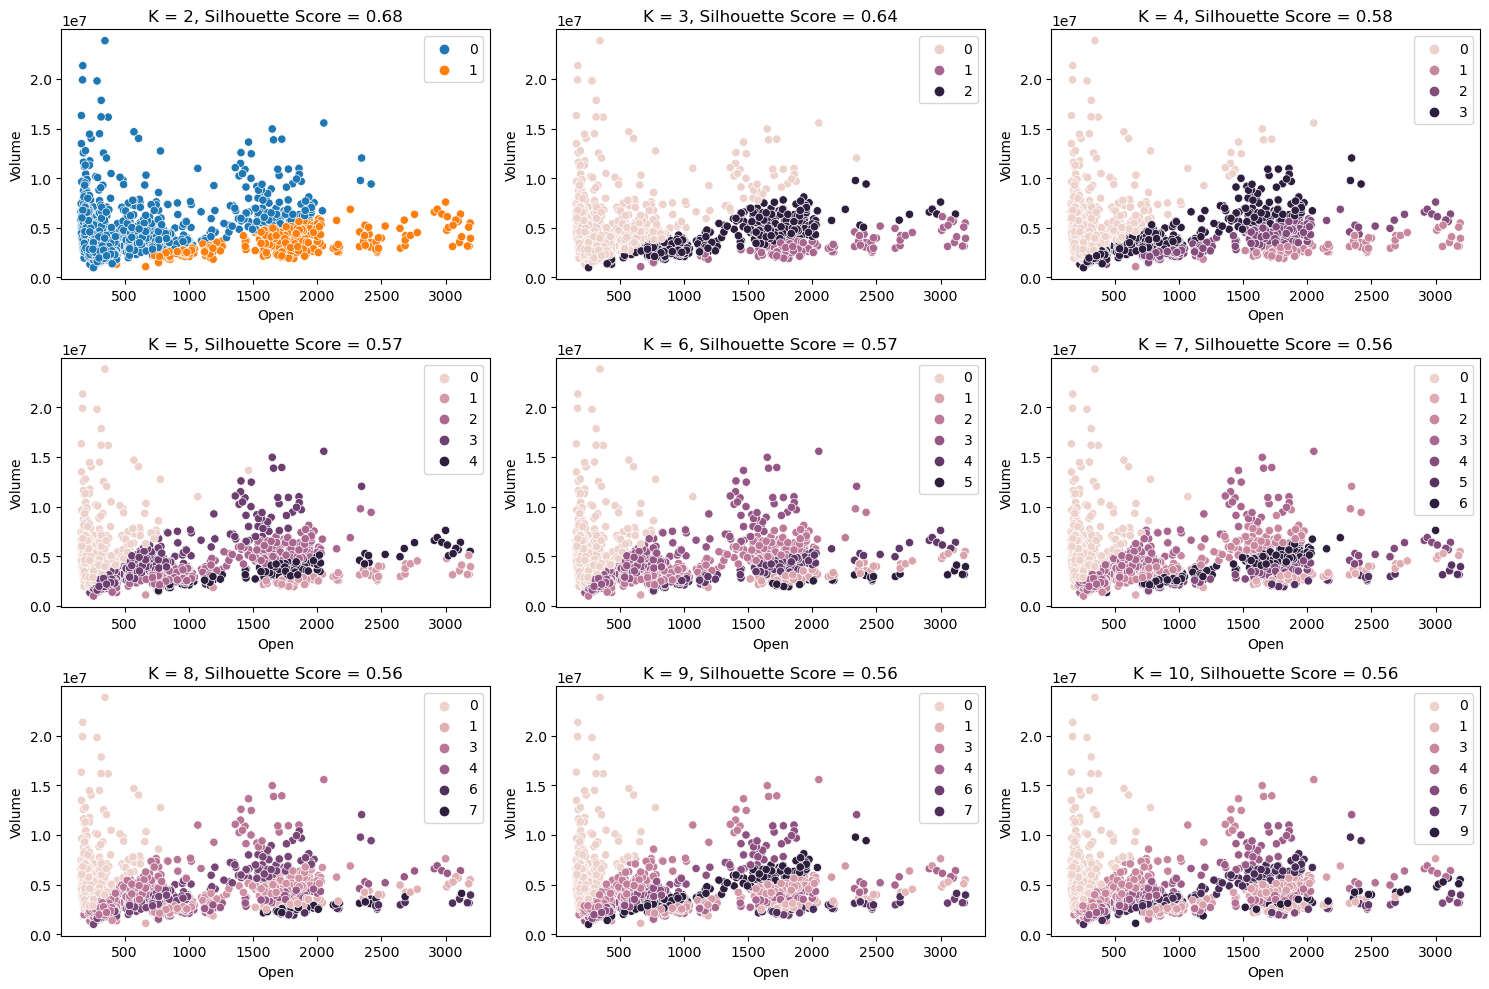

In [18]:

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterate over different values of K
for i, k in enumerate(K):
    #Plot the data points colored by cluster labels
    sns.scatterplot(data=X_train, x='Open', y='Volume', hue=fits[i].labels_, ax=axes[i])
    axes[i].set_title(f'K = {k}, Silhouette Score = {score[i]:.2f}')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

0.6422678786706146


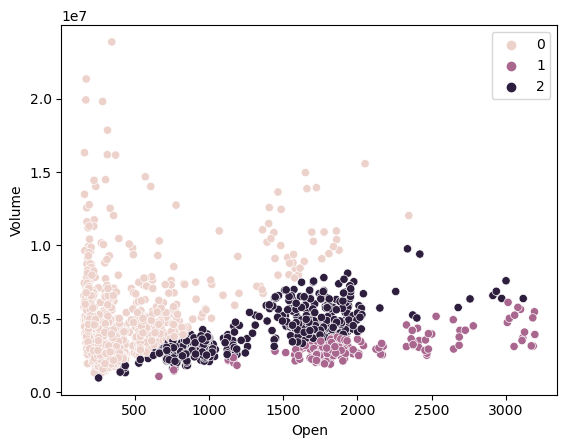

In [19]:
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = fits[1].labels_)
print(score[1])

0.5757099707653146


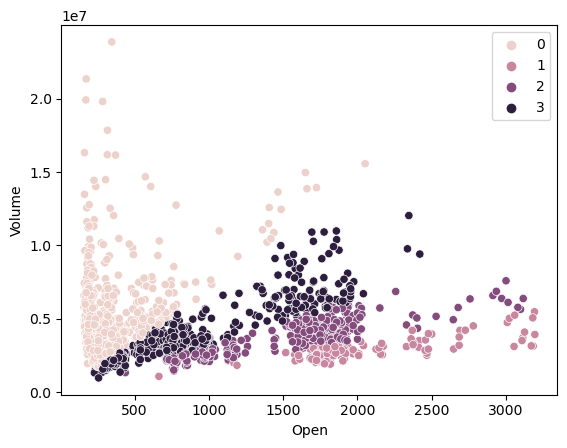

In [20]:
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = fits[2].labels_)
print(score[2])

0.5707035151992593


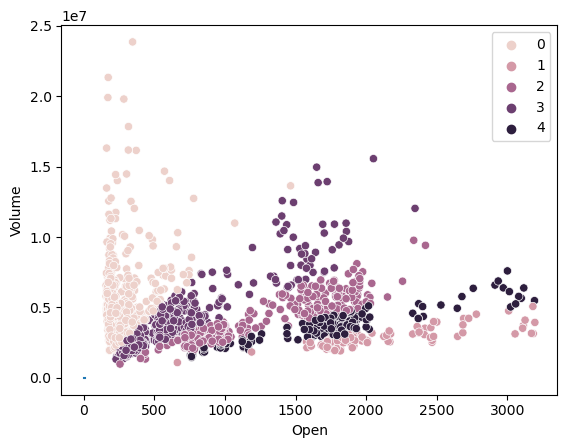

In [21]:
#Visually evalauting the performances of ALL k
sns.lineplot(x = K, y = score)
#Looking closely at two impressive k-values
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = fits[3].labels_)
print(score[3])

0.5735115737420751


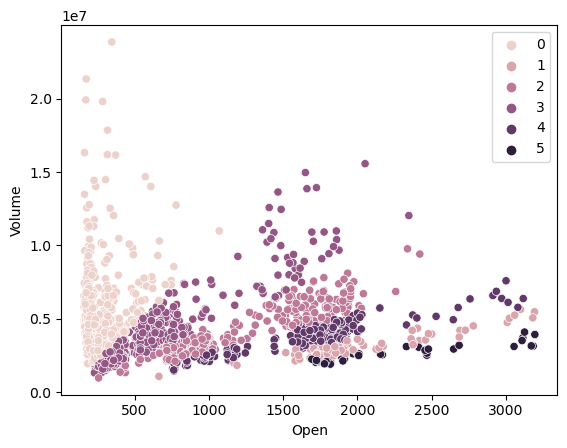

In [22]:
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = fits[4].labels_)
print(score[4])

0.5641599148460863


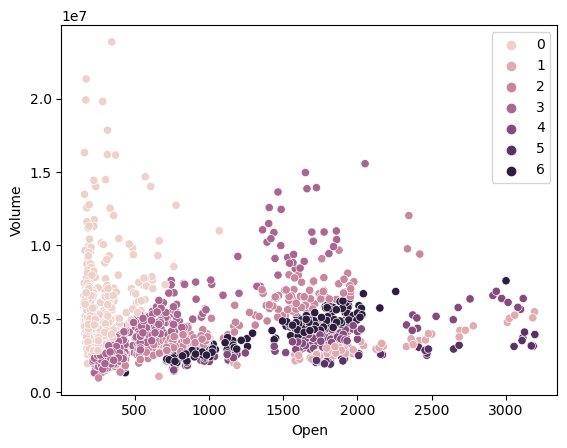

In [23]:
sns.scatterplot(data = X_train, x = 'Open', y = 'Volume', hue = fits[5].labels_)
print(score[5])

For n_clusters = 3 The average silhouette_score is : 0.6422678786706146


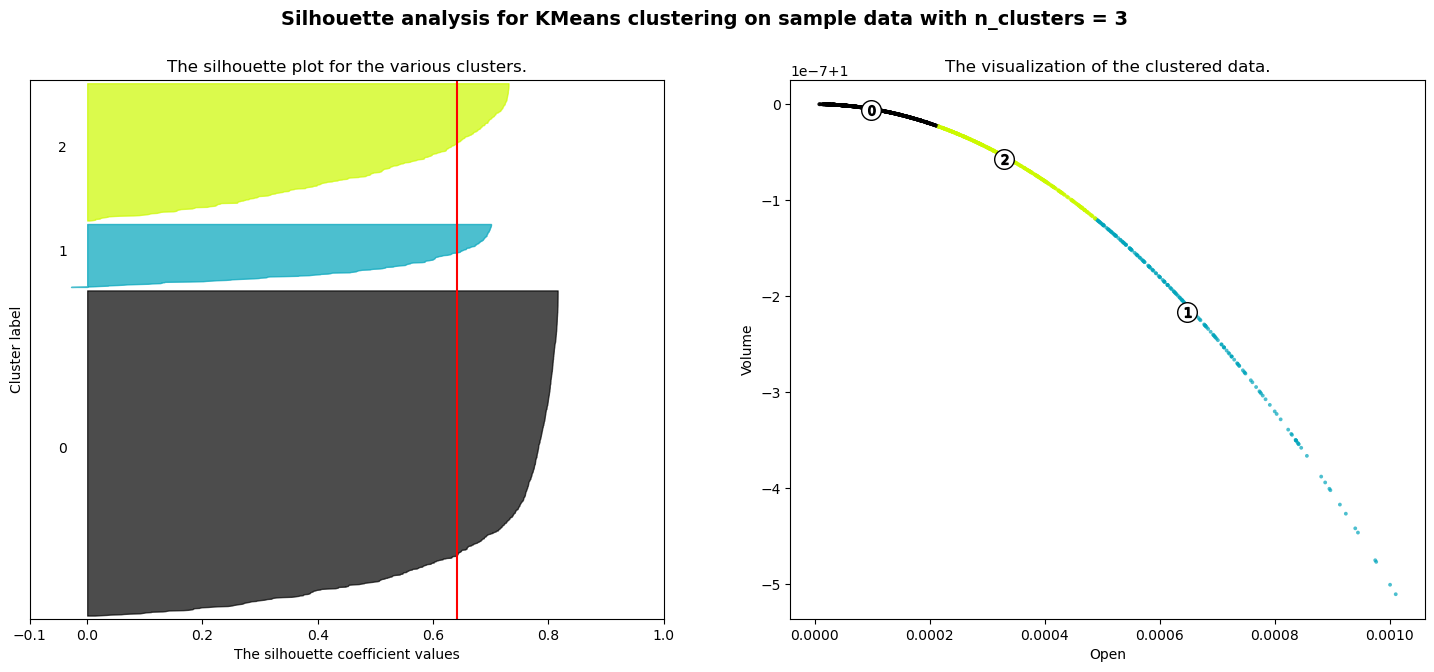

In [24]:

# train the model for current value of k on training data
n_clusters=3
model = KMeans(n_clusters = n_clusters, random_state = 0, n_init='auto').fit(X_train_norm)
cluster_labels=model.labels_

silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
# Compute the silhouette scores for each sample
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(X_train_norm, cluster_labels)

y_lower = 10
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_train_norm) + (n_clusters + 1) * 10])

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    # Compute the new y_lower for next plot
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # 10 for the 0 samples
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="-")
# Clear the yaxis labels / ticks
ax1.set_yticks([])
# 2nd Plot showing the actual clusters formed
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

# Labeling the clusters
ax2.scatter(X_train_norm[:, 0], X_train_norm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
   ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Open')
ax2.set_ylabel('Volume')
plt.suptitle(('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d' % n_clusters), fontsize=14, fontweight='bold')
plt.show()

In [25]:
scores = []
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X_train_norm):
    X_train = X_train_norm[train_index]
    X_test = X_train_norm[test_index]
    for k in range (2,16):
        km = KMeans(n_clusters=k, random_state=10, n_init = 10)
        km.fit(X_train)
        cluster_labels = km.predict(X_test)
        ssd = km.inertia_
        sil = silhouette_score(X_test, cluster_labels)
        scores.append({'K': k, 'SSD': ssd, 'Silhouette': sil})

In [26]:
print(scores)

[{'K': 2, 'SSD': 1.1884027189472865e-05, 'Silhouette': 0.6788193349185773}, {'K': 3, 'SSD': 5.401083431822777e-06, 'Silhouette': 0.645967584963883}, {'K': 4, 'SSD': 3.260565587407073e-06, 'Silhouette': 0.5705953301619965}, {'K': 5, 'SSD': 2.2020489140953615e-06, 'Silhouette': 0.5788102420146732}, {'K': 6, 'SSD': 1.4961415285830698e-06, 'Silhouette': 0.5682624142563462}, {'K': 7, 'SSD': 1.1220904568350124e-06, 'Silhouette': 0.5687137581212883}, {'K': 8, 'SSD': 8.338254686248659e-07, 'Silhouette': 0.5515596065084479}, {'K': 9, 'SSD': 6.706181186154961e-07, 'Silhouette': 0.5496496038119338}, {'K': 10, 'SSD': 5.402098618815157e-07, 'Silhouette': 0.5646190067167571}, {'K': 11, 'SSD': 4.4085226201249557e-07, 'Silhouette': 0.5417272974170606}, {'K': 12, 'SSD': 3.5710309113515165e-07, 'Silhouette': 0.5248021271784574}, {'K': 13, 'SSD': 3.1271965339486127e-07, 'Silhouette': 0.5330469327349705}, {'K': 14, 'SSD': 2.7276082470525476e-07, 'Silhouette': 0.5347404433862292}, {'K': 15, 'SSD': 2.360170